In [ ]:
pip install xgboost

In [ ]:
#data preprocessing
import pandas as pd
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC
#displayd data
from IPython.display import display
%matplotlib inline


In [ ]:
data = pd.read_csv('Cleaning 2018 - 2018.csv')

In [ ]:
display(data.head())

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HST,AST,HF,AF,Average FTHG,Averager FTHGC,AverageFTAG,AverageFTAGC,HTGRA,HTGCRA,ATGRA,ATGCRA,AverageHTGRA,AverageHTGCRA,AverageATGRA,AverageATGCRA
0,E0,10/08/2018,Man United,Leicester,2,1,H,6,4,11,8,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,4,1,11,9,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,6,9,9,11,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,1,4,9,8,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,2,5,11,12,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
del data['Div']
del data['Date']
del data['HomeTeam']
del data['AwayTeam']
del data['FTHG']
del data['FTAG']
del data['HST']
del data['AST']
del data['HF']
del data['AF']
del data['Average FTHG']
del data['Averager FTHGC']
del data['AverageFTAG']
del data['AverageFTAGC']
del data['HTGRA']
del data['HTGCRA']
del data['ATGRA']
del data['ATGCRA']


In [ ]:
display(data.head())

,FTR,AverageHTGRA,AverageHTGCRA,AverageATGRA,AverageATGCRA
0,H,0.0,0.0,0.0,0.0
1,H,0.0,0.0,0.0,0.0
2,A,0.0,0.0,0.0,0.0
3,A,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0


In [ ]:

#what is the win rate for the home team?

# Total number of matches.
n_matches = data.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches:",n_matches)
print ("Number of features:",n_features)
print ("Number of matches won by home team",n_homewins)
print ("Win rate of home team:",win_rate,"%")

Total number of matches: 380
Number of features: 4
Number of matches won by home team 181
Win rate of home team: 47.63157894736842 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5017ead5c0>,
      dtype=object)

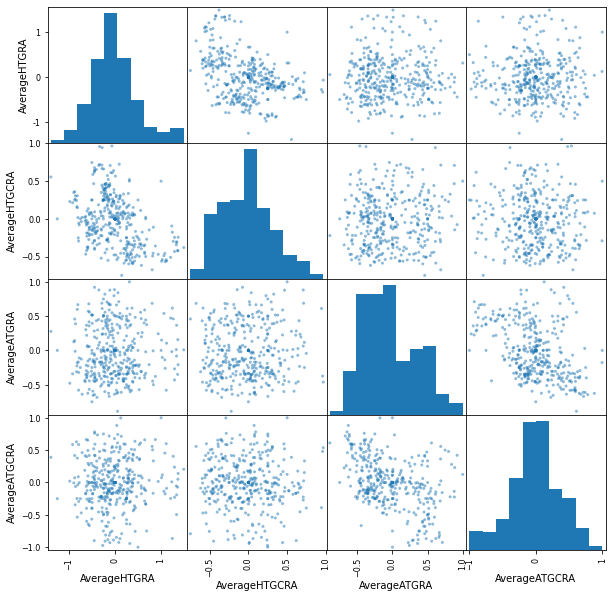

In [ ]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#Average HTGRA - Average home team goals relative to average, how many more or less goals does the home team score against relative to the visiting teams away goals conceded average
#Average HTGCRA - Average home team goals conceded relative to average
#Average ATGRA - Average away team goals scored relative to average
#Average ATGCRA - Average away team goals scored relative to average


scatter_matrix(data[['AverageHTGRA','AverageHTGCRA','AverageATGRA','AverageATGCRA']], figsize=(10,10))

In [ ]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['AverageHTGRA','AverageHTGCRA','AverageATGRA','AverageATGCRA']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [ ]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [ ]:

#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in",end - start, "seconds")

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in" ,end - start, "seconds")
    
    return f1_score(target, y_pred, pos_label='H',average='micro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a",clf.__class__.__name__, "using a training set size of",len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set:", f1 , acc)
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set:", f1 , acc)

In [ ]:

# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 330
Trained model in 0.013337373733520508 seconds
Made predictions in 0.0013270378112792969 seconds
0.6454545454545455 0.6454545454545455
F1 score and accuracy score for training set: 0.6454545454545455 0.6454545454545455
Made predictions in 0.0008373260498046875 seconds
F1 score and accuracy score for test set: 0.7 0.7

Training a SVC using a training set size of 330
Trained model in 0.007753849029541016 seconds
Made predictions in 0.0032329559326171875 seconds
0.6666666666666666 0.6666666666666666
F1 score and accuracy score for training set: 0.6666666666666666 0.6666666666666666
Made predictions in 0.0013089179992675781 seconds
F1 score and accuracy score for test set: 0.7 0.7

Training a XGBClassifier using a training set size of 330
Trained model in 0.05349278450012207 seconds
Made predictions in 0.0046710968017578125 seconds
0.8575757575757575 0.8575757575757575
F1 score and accuracy score for training set: 0.857575757575

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average !